### Part 1 : Voronoi mesh generation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import geopandas as gpd
from mf6Voronoi.geoVoronoi import createVoronoi
from mf6Voronoi.geoUtils import plotOrgDistPoints, plotCirclesPoints, plotKeyList

In [2]:

#Create mesh object
vorMesh = createVoronoi(meshName='siteDewatering',maxRef = 10, multiplier=1.5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../examples/siteDewatering/Shp/modelAoi2.shp')
vorMesh.addLayer('ghb','../../examples/siteDewatering/Shp/modelGhb.shp',2)
vorMesh.addLayer('drn','../../examples/siteDewatering/Shp/drains.shp',1)
vorMesh.addLayer('wel','../../examples/siteDewatering/Shp/pointWell.shp',1)


/--------Sumary of cell discretization-------/
Maximun refinement progressive: 8.12 m.
Maximun refinement coarse areas: 10.00 m.
Minimum refinement: 1.00 m.
Cell size list: [1.    2.5   4.75  8.125] m.
/--------------------------------------------/


/----Sumary of points for voronoi meshing----/
Distributed points from layers: 493
Points from layer buffers: 1756
Points from max refinement areas: 388
Points from min refinement areas: 0
Total points inside the limit: 2337
/--------------------------------------------/

Time required for point generation: 0.32 seconds 

The output folder ../examples/siteDewatering/output exists


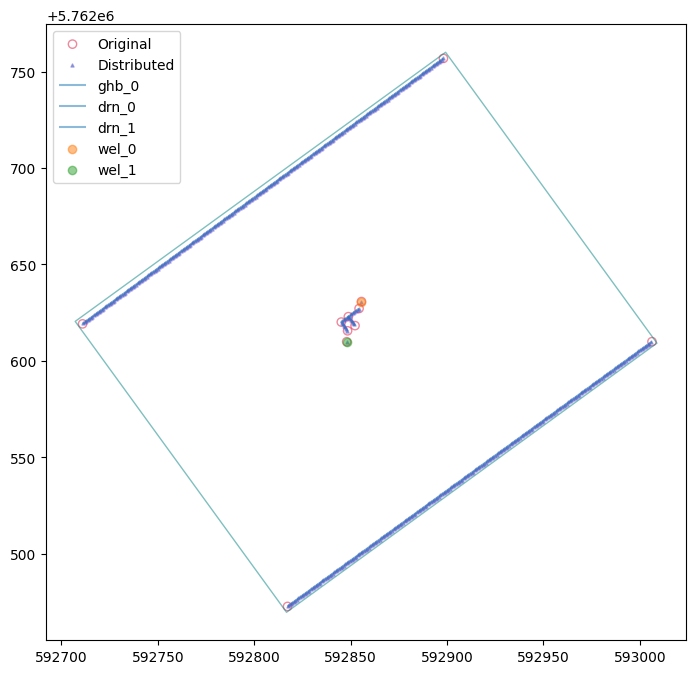

In [3]:
#Generate point pair array
vorMesh.generateOrgDistVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()

In [ ]:
#Generate point pair array
vorMesh.extractOrgVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()



vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')

In [ ]:
plotOrgDistPoints(vorMesh)

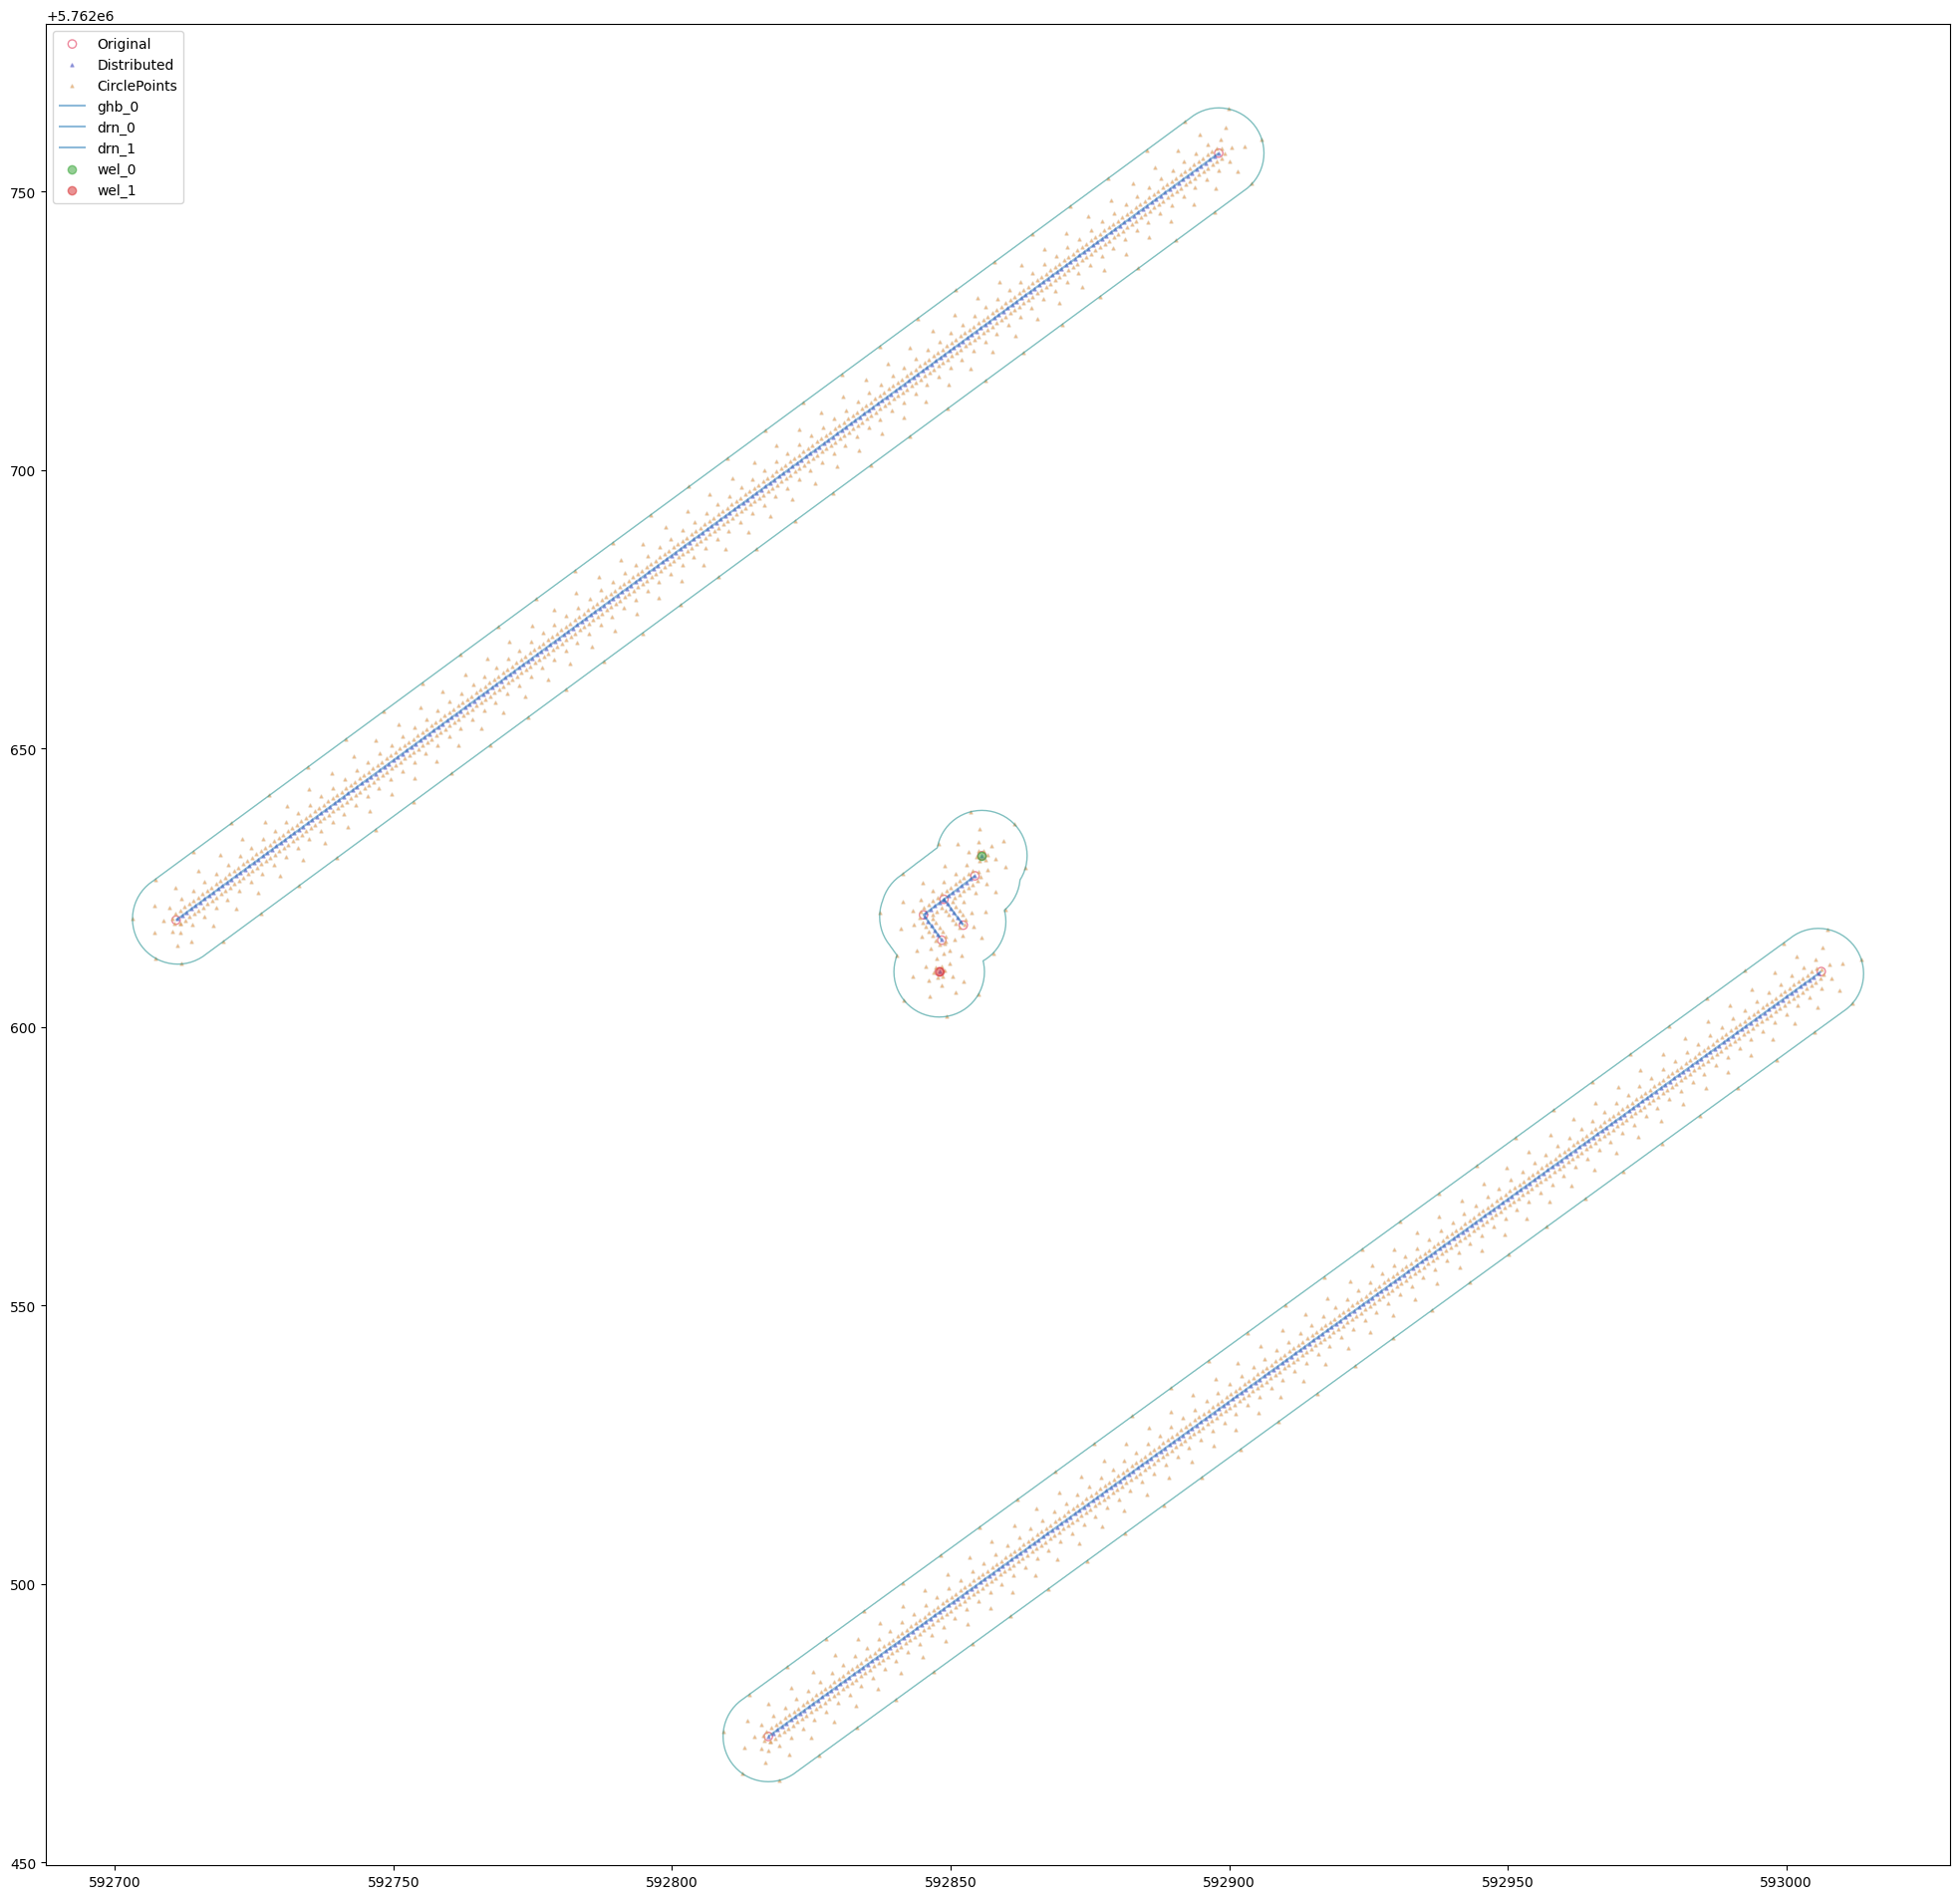

In [4]:
plotCirclesPoints(vorMesh)

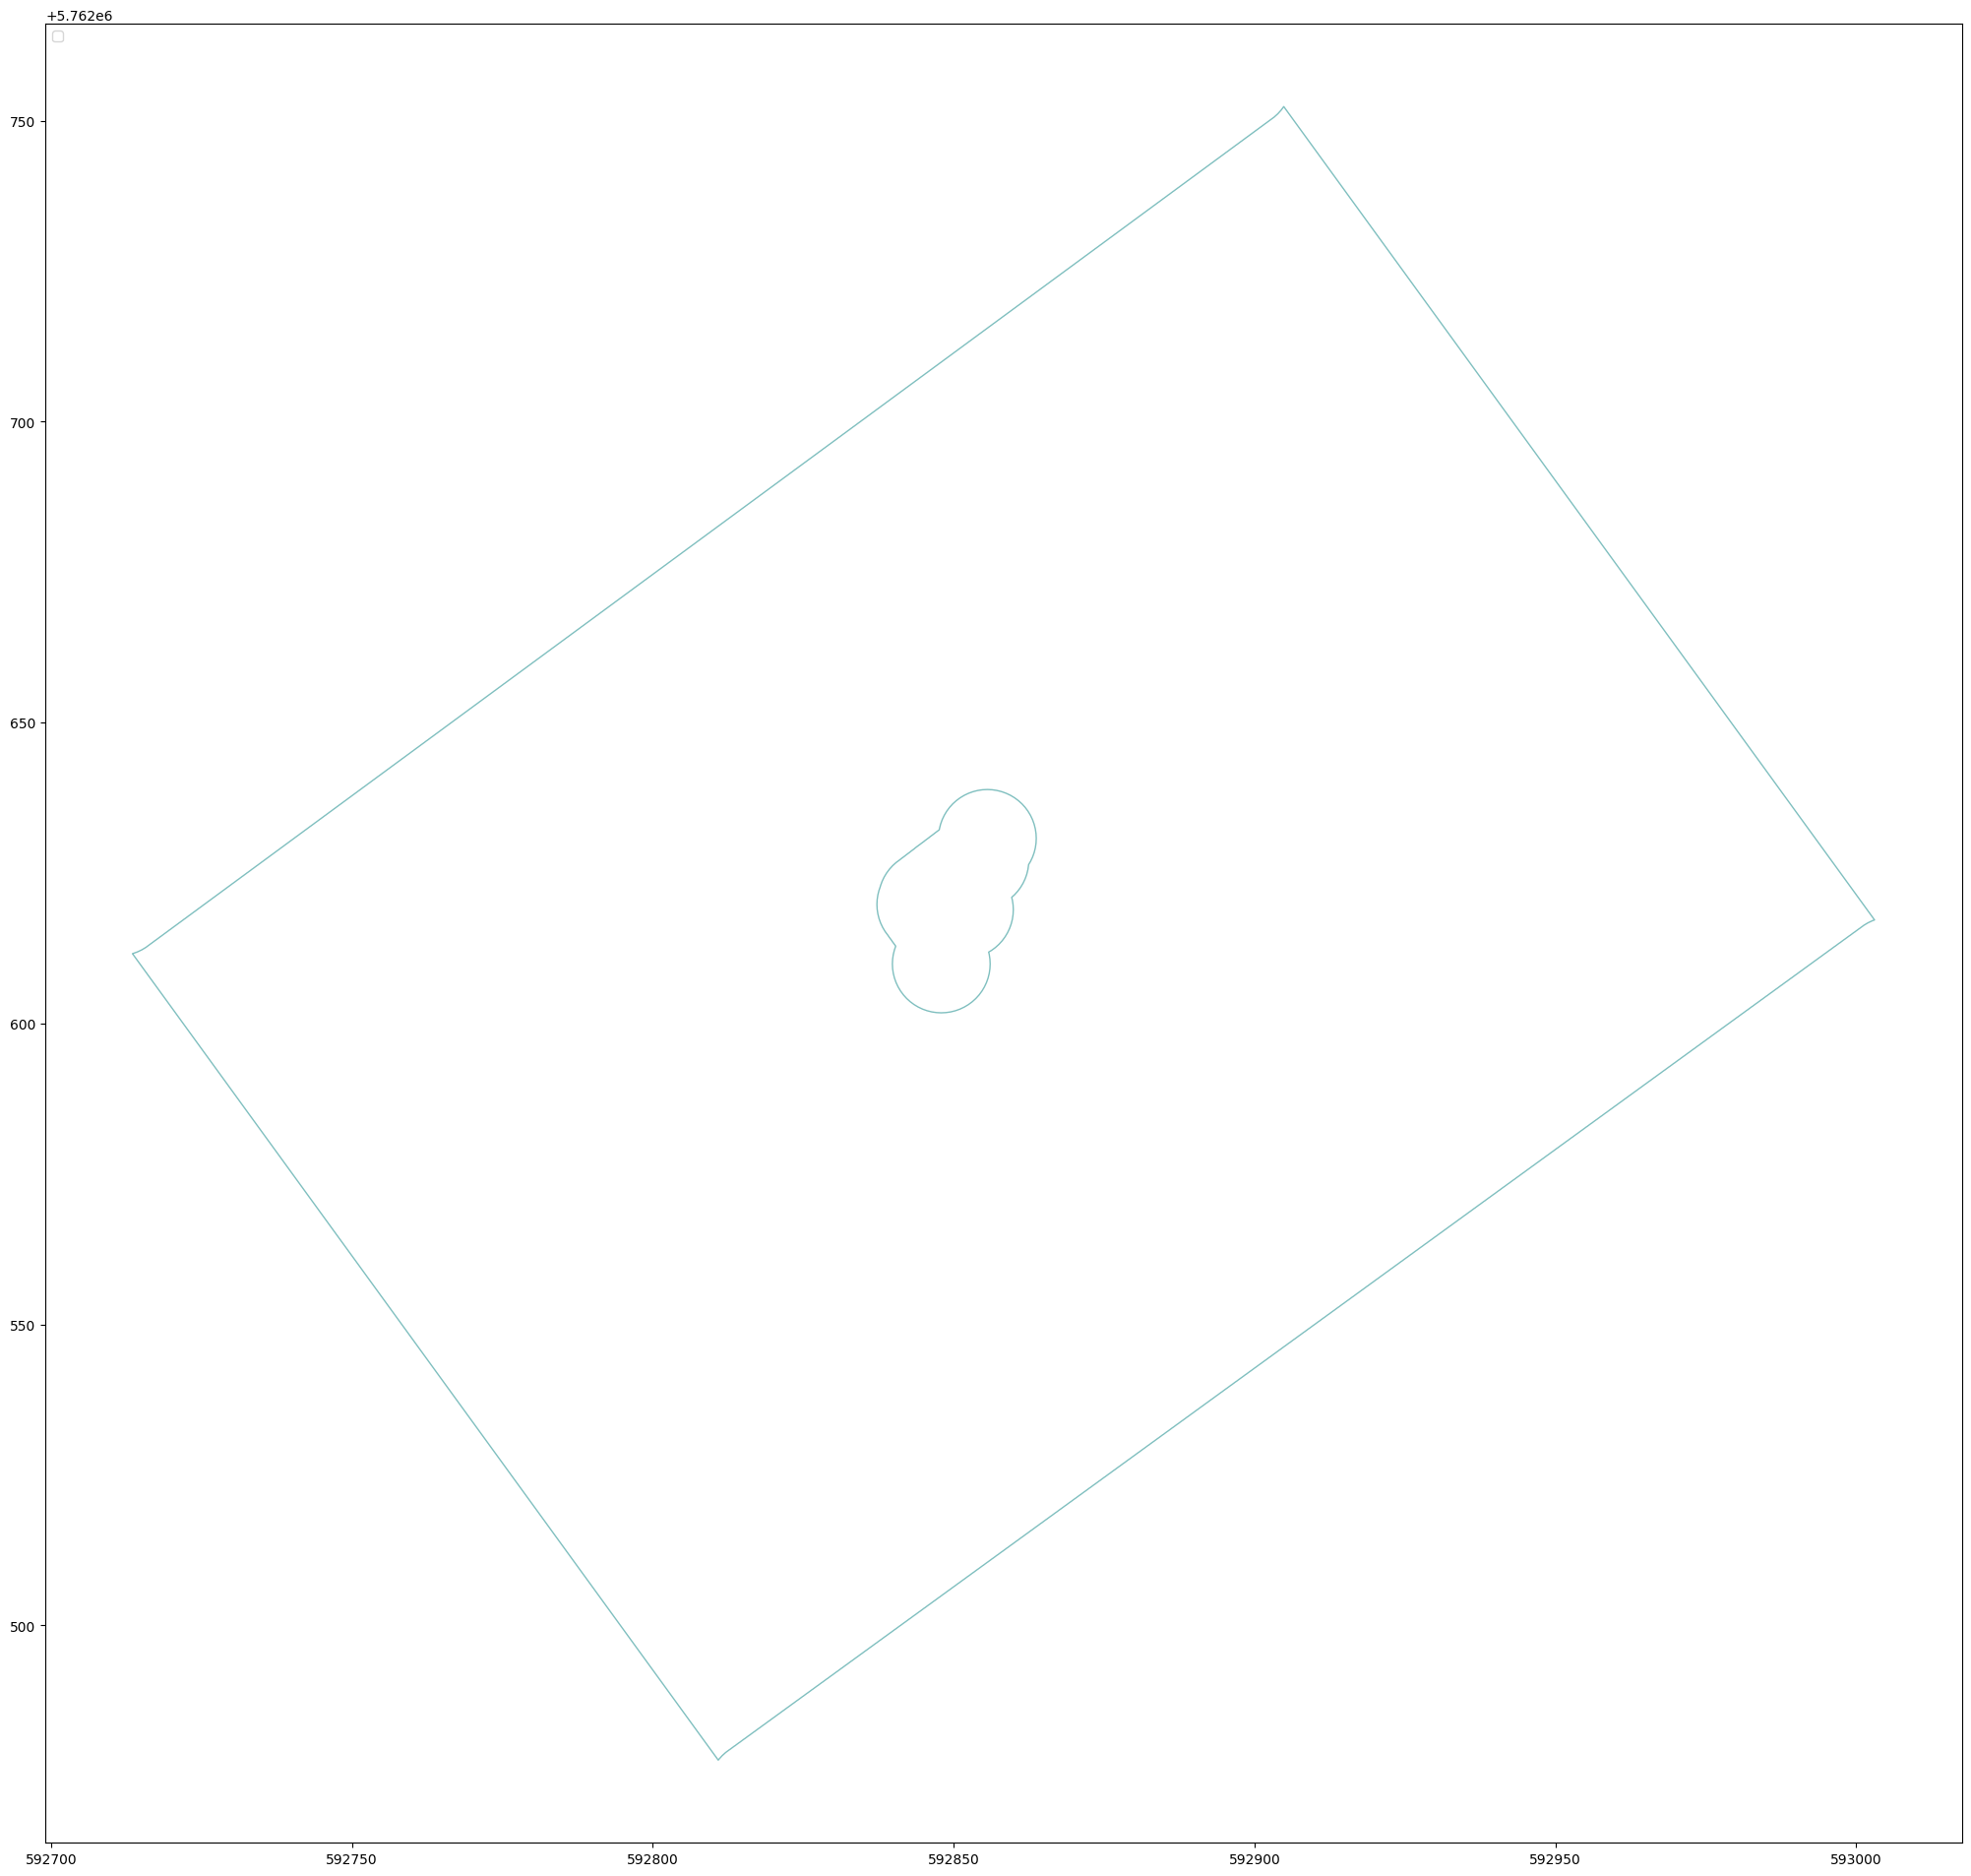

In [5]:
plotKeyList(vorMesh, ['pointsMaxRefPoly'])

In [6]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file(outPath+'/voronoiRegions.shp')

<Axes: >

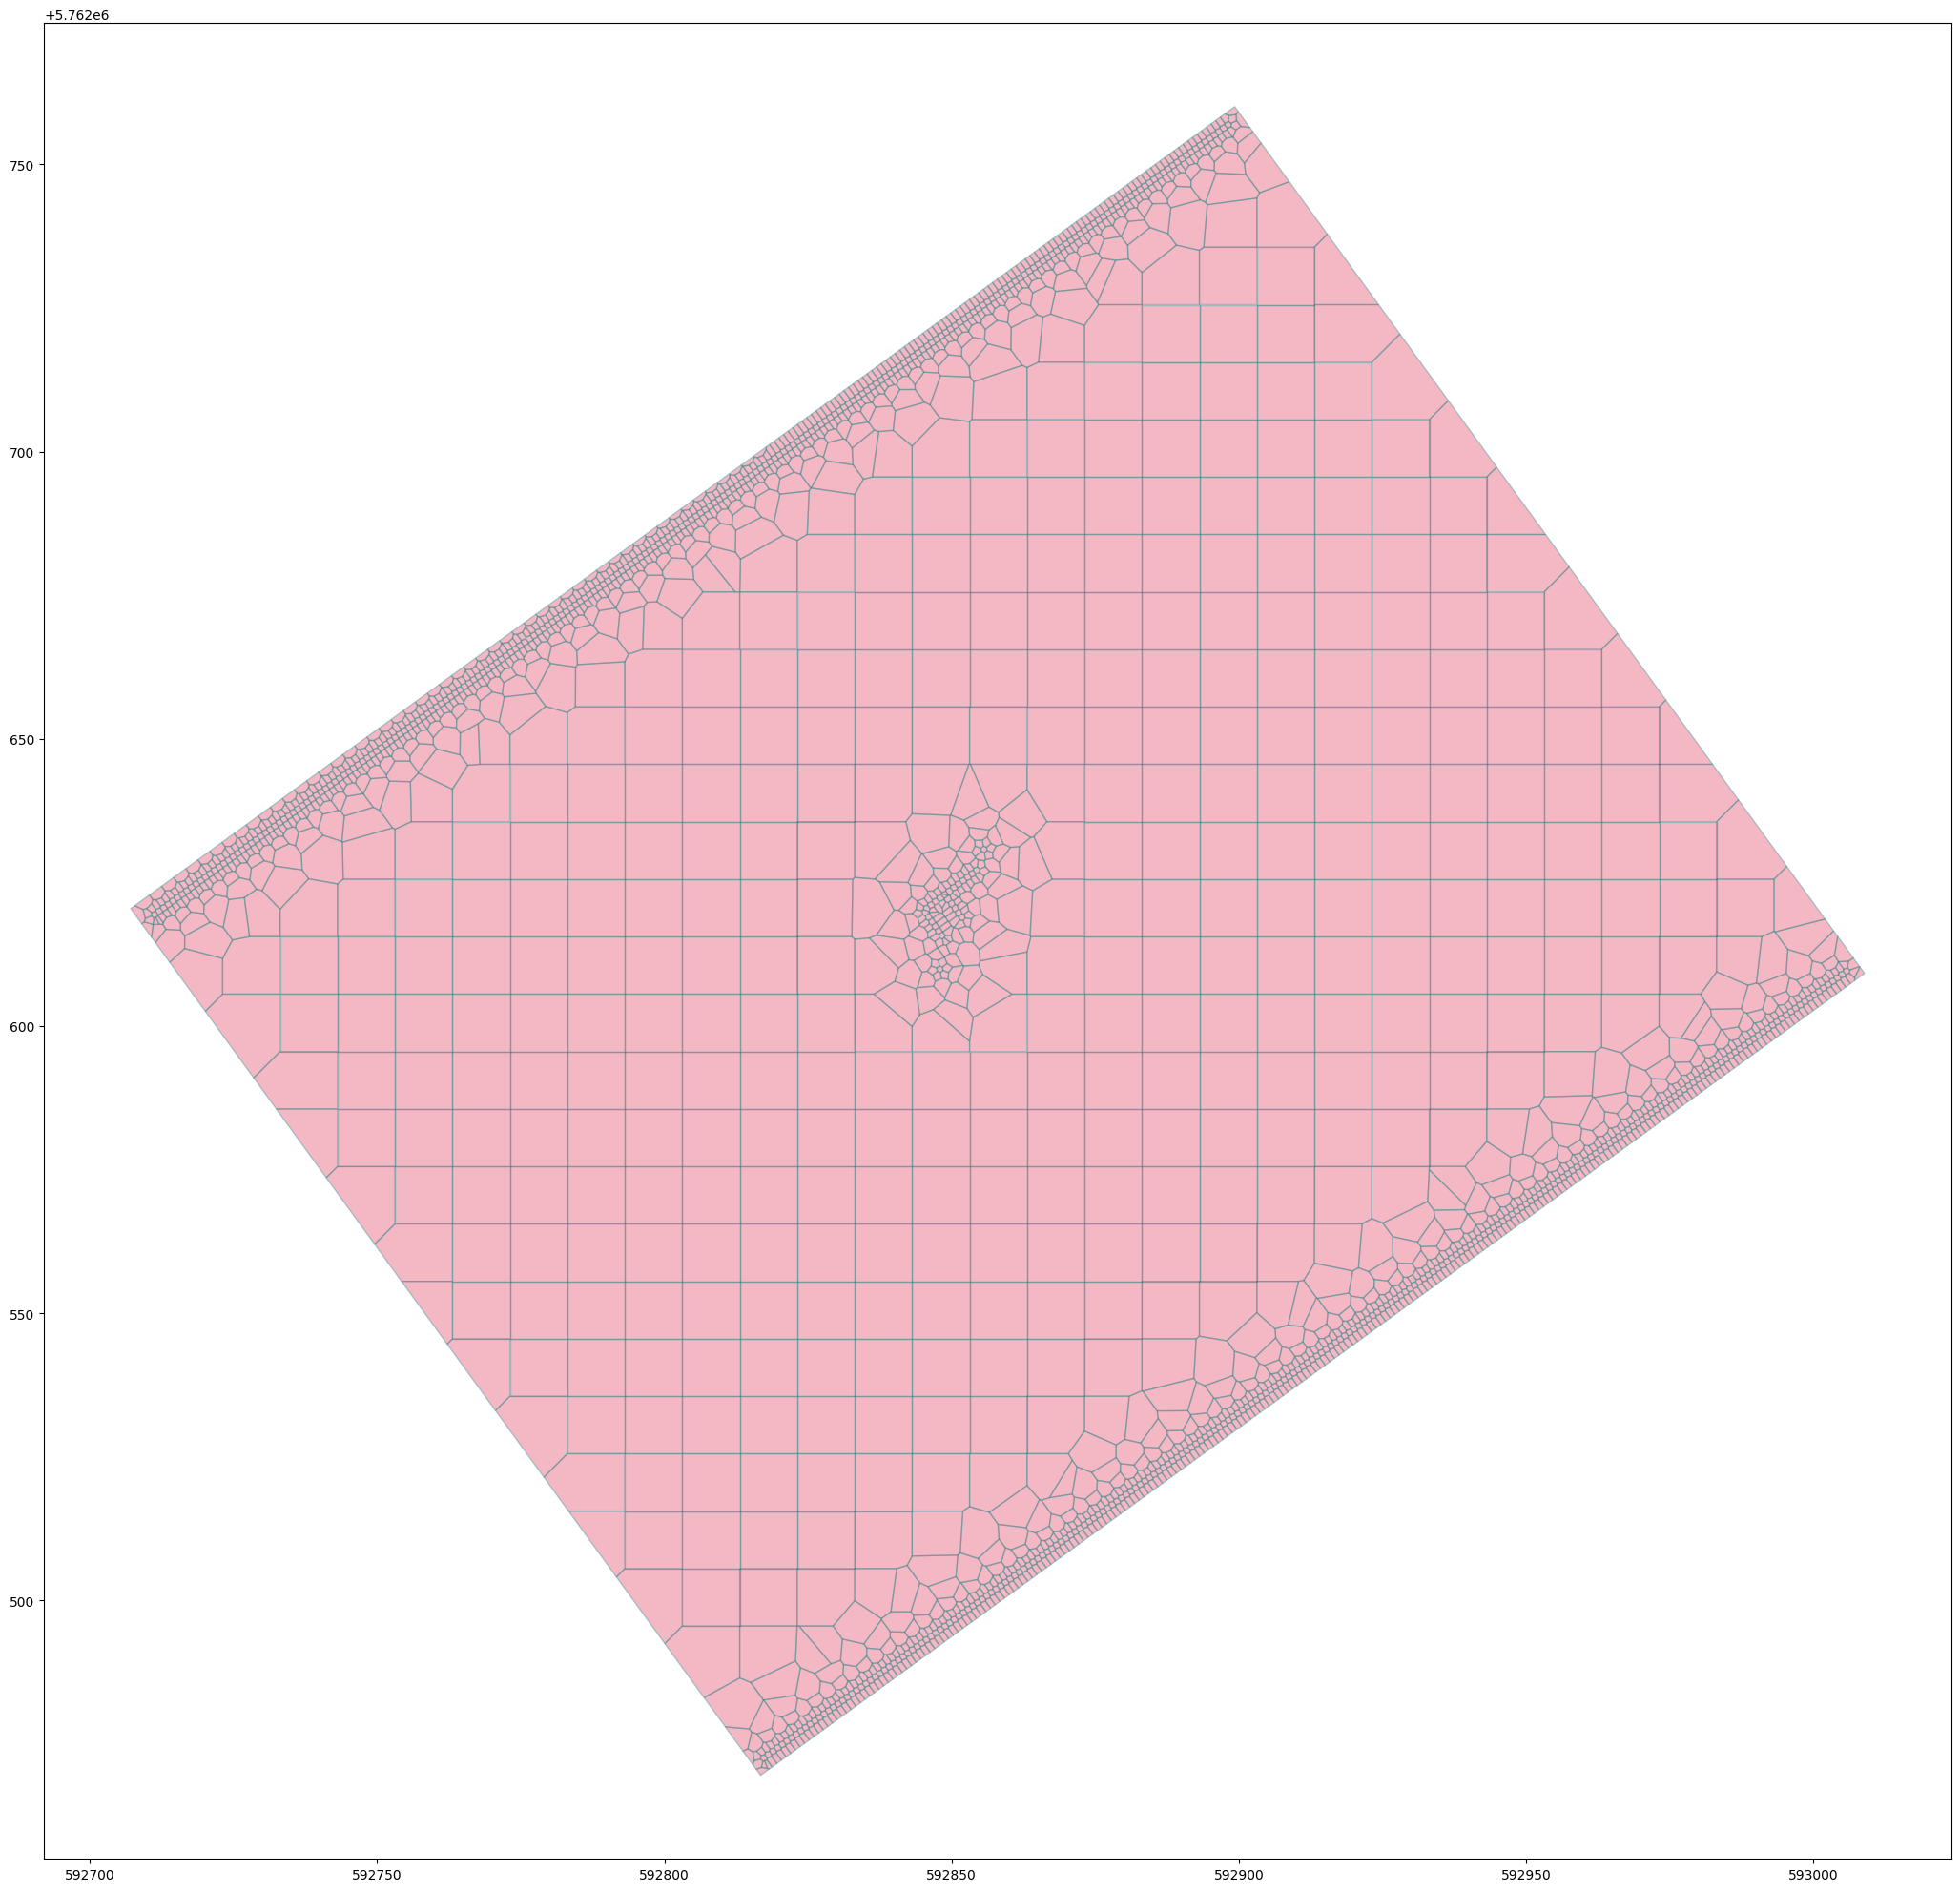

In [8]:
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal')